In [1]:
using DataFrames, FileIO, DelimitedFiles
using Plots, Optim, LsqFit, JUMD
using Statistics, NamedArrays

In [2]:
# Get ready
dir_eol_watlig = "/home/pbarletta/labo/20/reobp/run/eol/watlig"

aa = 119
nstlim = 12000
phs = collect(2.0:.5:7.5)
idx = collect(1:12)

titrable_resis = [4, 5, 11, 13, 20, 24, 30, 33, 37, 39, 40,
    48, 58, 73, 77, 78, 87, 93, 94, 97, 117]
titrable_resnames = ["GL4", "GL4", "HIP", "GL4", "GL4", "AS4",
    "AS4", "GL4", "AS4", "GL4", "AS4", "GL4", "AS4", "GL4", "AS4",
    "GL4", "AS4", "GL4", "GL4", "HIP", "AS4"]
titrable_cnt = length(titrable_resis)

idx_of_titrable = fill(0, aa)
[ idx_of_titrable[titrable_resis[i]] = i for i in 1:titrable_cnt ];

titrable_residues = [ string(titrable_resnames[i], "_", titrable_resis[i]) 
    for i in 1:titrable_cnt ];

In [3]:
for i in 1:12
    PH = convert(Int64, phs[i] * 10)
    global watlig_phs = convert(Array{Float64, 1},
    readdlm(joinpath(dir_eol_watlig, string(phs[i]), "close_wat.dat"))[2:end, 3])

    sym_watlig_1_phs = Symbol("watlig_dist_1_", PH)
    sym_watlig_2_phs = Symbol("watlig_dist_2_", PH)
    eval(:($sym_watlig_1_phs = watlig_phs[1:2:end]))
    eval(:($sym_watlig_2_phs = watlig_phs[2:2:end]))
end

## O1 distance to closest water

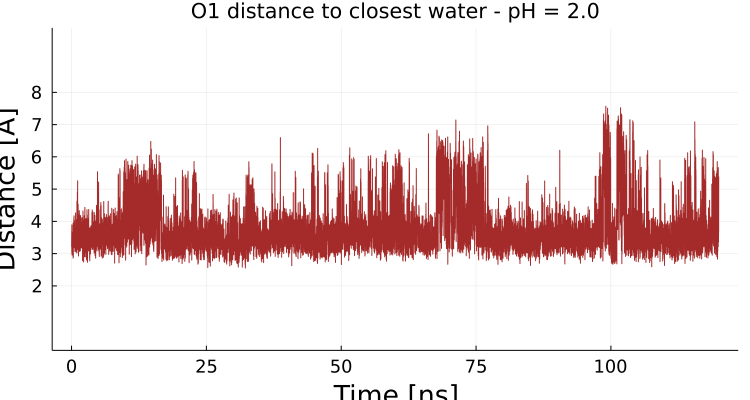

In [4]:
min_dist = 0
max_dist = 10
plot(collect(1:nstlim) ./ 100, watlig_dist_1_20,
    title = string("O1 distance to closest water - pH = ", 2.0), size = (750, 400),
    ylims = (min_dist, max_dist), label = false,
    yticks = collect(2:1:8),
    linecolor = Colors.colorant"Brown",
    guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
    legendfont = font(12, "Arial"),
    yaxis = "Distance [A]", xaxis = "Time [ns]")

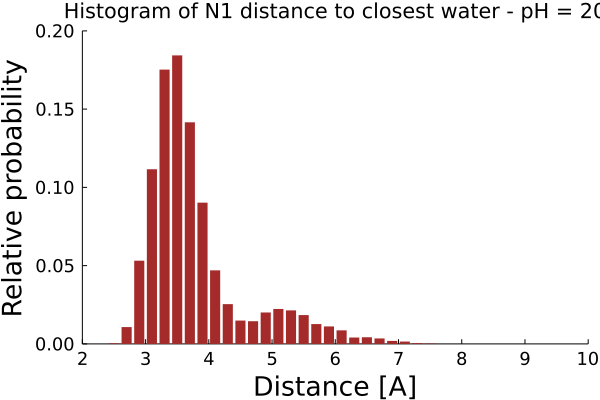

In [5]:
st = .2
bin_watlig = collect(min_dist:st:max_dist)
wgh_watlig = fill(1.0, length(watlig_dist_1_20))

# Histograma ponderado
Wbins_watlig, Whis_watlig = JUMD.weightedHist(watlig_dist_1_20, bin_watlig, wgh_watlig, true, false);

bar(Wbins_watlig, Whis_watlig,
    xlims = (st*10, max_dist), ylims = (0, .2),
    xticks = st*10:st*5:max_dist+st,
    linecolor = false, fillcolor = Colors.colorant"Brown",
    grid = false, legend = false,
    guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
    legendfont = font(12, "Arial"),
    title = string("Histogram of N1 distance to closest water - pH = ", 20),
    yaxis = "Relative probability", xaxis = "Distance [A]")

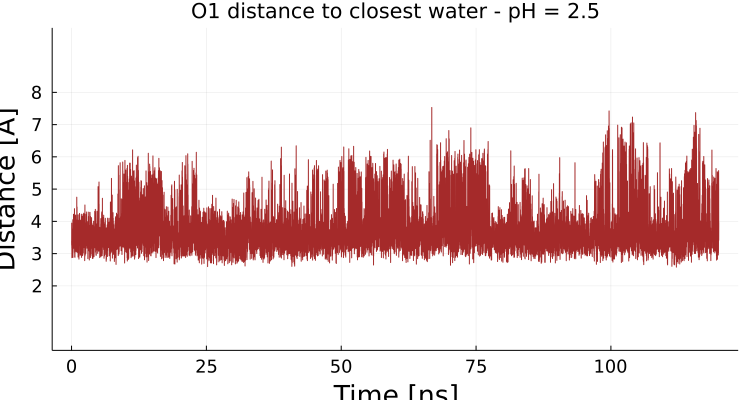

In [6]:
min_dist = 0
max_dist = 10
plot(collect(1:nstlim) ./ 100, watlig_dist_1_25,
    title = string("O1 distance to closest water - pH = ", 2.5), size = (750, 400),
    ylims = (min_dist, max_dist), label = false,
    yticks = collect(2:1:8),
    linecolor = Colors.colorant"Brown",
    guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
    legendfont = font(12, "Arial"),
    yaxis = "Distance [A]", xaxis = "Time [ns]")

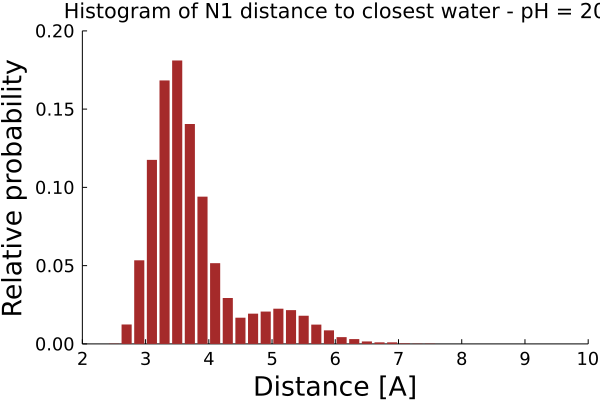

In [7]:
st = .2
bin_watlig = collect(min_dist:st:max_dist)
wgh_watlig = fill(1.0, length(watlig_dist_1_25))

# Histograma ponderado
Wbins_watlig, Whis_watlig = JUMD.weightedHist(watlig_dist_1_25, bin_watlig, wgh_watlig, true, false);

bar(Wbins_watlig, Whis_watlig,
    xlims = (st*10, max_dist), ylims = (0, .2),
    xticks = st*10:st*5:max_dist+st,
    linecolor = false, fillcolor = Colors.colorant"Brown",
    grid = false, legend = false,
    guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
    legendfont = font(12, "Arial"),
    title = string("Histogram of N1 distance to closest water - pH = ", 20),
    yaxis = "Relative probability", xaxis = "Distance [A]")

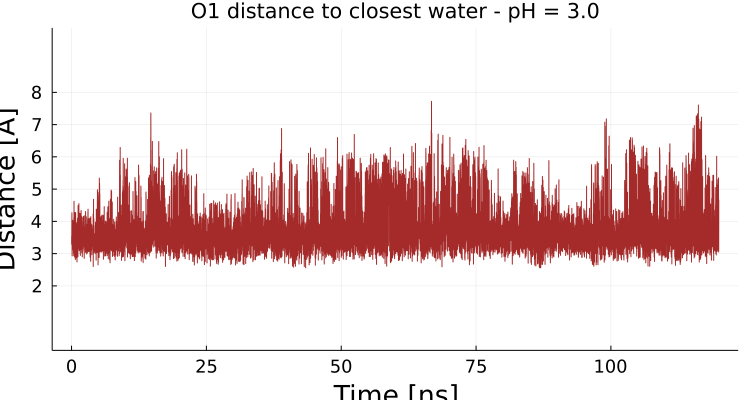

In [8]:
min_dist = 0
max_dist = 10
plot(collect(1:nstlim) ./ 100, watlig_dist_1_30,
    title = string("O1 distance to closest water - pH = ", 3.0), size = (750, 400),
    ylims = (min_dist, max_dist), label = false,
    yticks = collect(2:1:8),
    linecolor = Colors.colorant"Brown",
    guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
    legendfont = font(12, "Arial"),
    yaxis = "Distance [A]", xaxis = "Time [ns]")

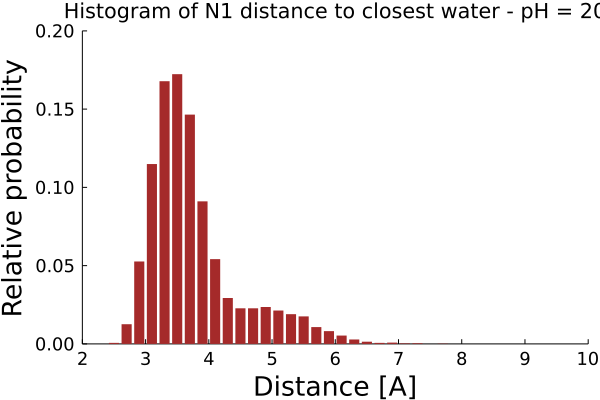

In [9]:
st = .2
bin_watlig = collect(min_dist:st:max_dist)
wgh_watlig = fill(1.0, length(watlig_dist_1_30))

# Histograma ponderado
Wbins_watlig, Whis_watlig = JUMD.weightedHist(watlig_dist_1_30, bin_watlig, wgh_watlig, true, false);

bar(Wbins_watlig, Whis_watlig,
    xlims = (st*10, max_dist), ylims = (0, .2),
    xticks = st*10:st*5:max_dist+st,
    linecolor = false, fillcolor = Colors.colorant"Brown",
    grid = false, legend = false,
    guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
    legendfont = font(12, "Arial"),
    title = string("Histogram of N1 distance to closest water - pH = ", 20),
    yaxis = "Relative probability", xaxis = "Distance [A]")

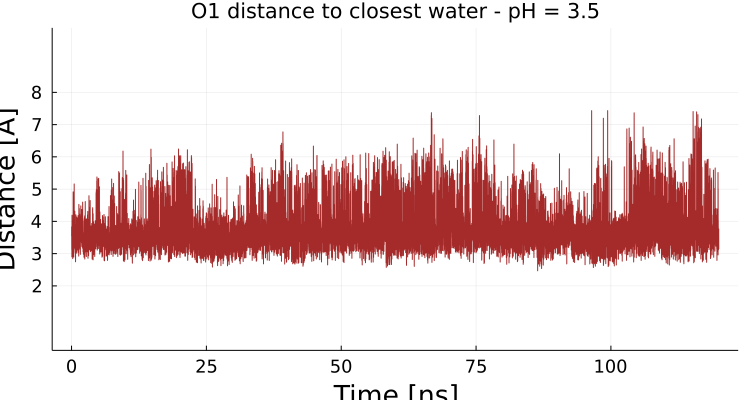

In [10]:
min_dist = 0
max_dist = 10
plot(collect(1:nstlim) ./ 100, watlig_dist_1_35,
    title = string("O1 distance to closest water - pH = ", 3.5), size = (750, 400),
    ylims = (min_dist, max_dist), label = false,
    yticks = collect(2:1:8),
    linecolor = Colors.colorant"Brown",
    guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
    legendfont = font(12, "Arial"),
    yaxis = "Distance [A]", xaxis = "Time [ns]")

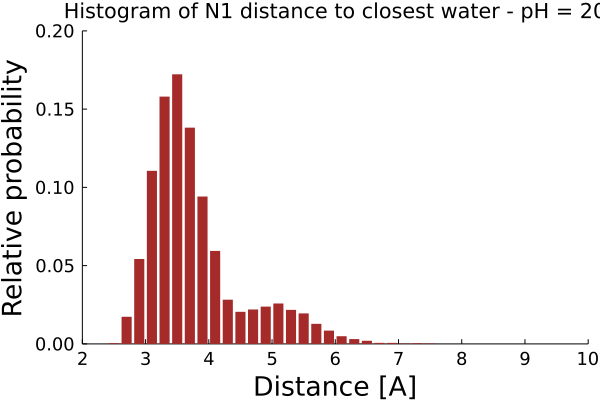

In [11]:
st = .2
bin_watlig = collect(min_dist:st:max_dist)
wgh_watlig = fill(1.0, length(watlig_dist_1_35))

# Histograma ponderado
Wbins_watlig, Whis_watlig = JUMD.weightedHist(watlig_dist_1_35, bin_watlig, wgh_watlig, true, false);

bar(Wbins_watlig, Whis_watlig,
    xlims = (st*10, max_dist), ylims = (0, .2),
    xticks = st*10:st*5:max_dist+st,
    linecolor = false, fillcolor = Colors.colorant"Brown",
    grid = false, legend = false,
    guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
    legendfont = font(12, "Arial"),
    title = string("Histogram of N1 distance to closest water - pH = ", 20),
    yaxis = "Relative probability", xaxis = "Distance [A]")

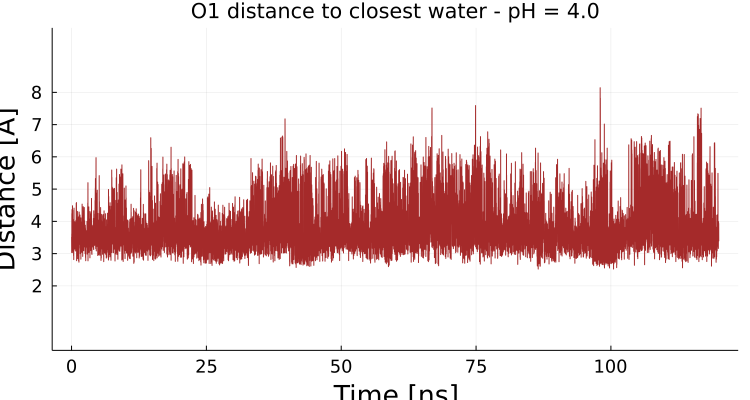

In [12]:
min_dist = 0
max_dist = 10
plot(collect(1:nstlim) ./ 100, watlig_dist_1_40,
    title = string("O1 distance to closest water - pH = ", 4.0), size = (750, 400),
    ylims = (min_dist, max_dist), label = false,
    yticks = collect(2:1:8),
    linecolor = Colors.colorant"Brown",
    guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
    legendfont = font(12, "Arial"),
    yaxis = "Distance [A]", xaxis = "Time [ns]")

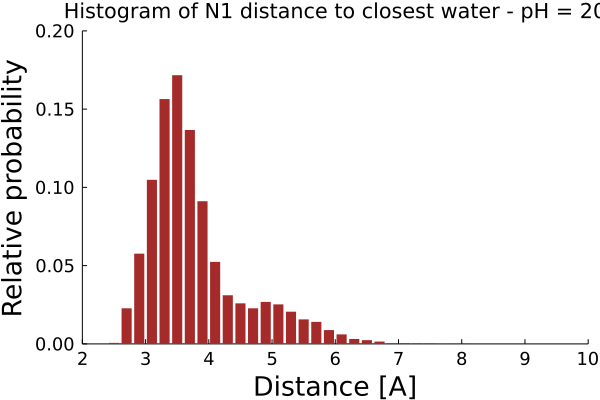

In [13]:
st = .2
bin_watlig = collect(min_dist:st:max_dist)
wgh_watlig = fill(1.0, length(watlig_dist_1_40))

# Histograma ponderado
Wbins_watlig, Whis_watlig = JUMD.weightedHist(watlig_dist_1_40, bin_watlig, wgh_watlig, true, false);

bar(Wbins_watlig, Whis_watlig,
    xlims = (st*10, max_dist), ylims = (0, .2),
    xticks = st*10:st*5:max_dist+st,
    linecolor = false, fillcolor = Colors.colorant"Brown",
    grid = false, legend = false,
    guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
    legendfont = font(12, "Arial"),
    title = string("Histogram of N1 distance to closest water - pH = ", 20),
    yaxis = "Relative probability", xaxis = "Distance [A]")

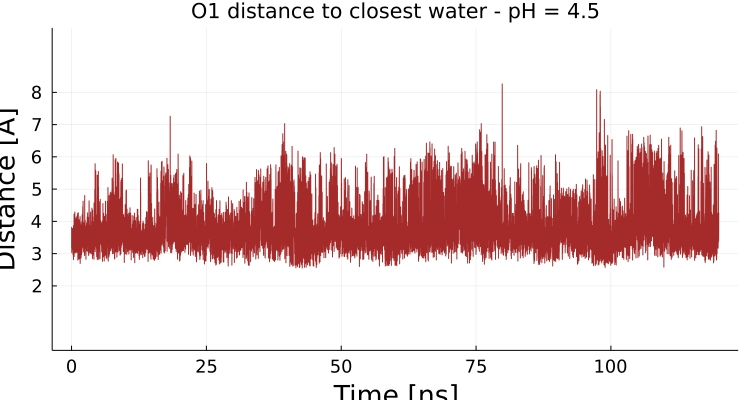

In [14]:
min_dist = 0
max_dist = 10
plot(collect(1:nstlim) ./ 100, watlig_dist_1_45,
    title = string("O1 distance to closest water - pH = ", 4.5), size = (750, 400),
    ylims = (min_dist, max_dist), label = false,
    yticks = collect(2:1:8),
    linecolor = Colors.colorant"Brown",
    guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
    legendfont = font(12, "Arial"),
    yaxis = "Distance [A]", xaxis = "Time [ns]")

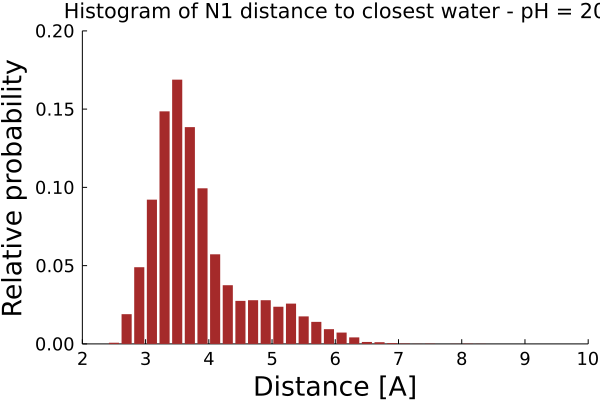

In [15]:
st = .2
bin_watlig = collect(min_dist:st:max_dist)
wgh_watlig = fill(1.0, length(watlig_dist_1_45))

# Histograma ponderado
Wbins_watlig, Whis_watlig = JUMD.weightedHist(watlig_dist_1_45, bin_watlig, wgh_watlig, true, false);

bar(Wbins_watlig, Whis_watlig,
    xlims = (st*10, max_dist), ylims = (0, .2),
    xticks = st*10:st*5:max_dist+st,
    linecolor = false, fillcolor = Colors.colorant"Brown",
    grid = false, legend = false,
    guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
    legendfont = font(12, "Arial"),
    title = string("Histogram of N1 distance to closest water - pH = ", 20),
    yaxis = "Relative probability", xaxis = "Distance [A]")

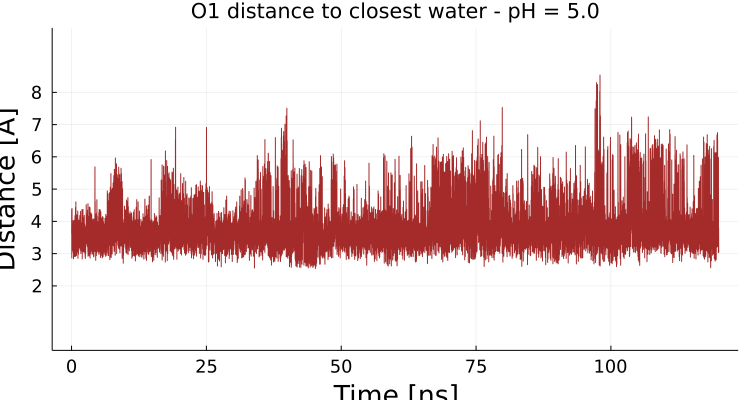

In [16]:
min_dist = 0
max_dist = 10
plot(collect(1:nstlim) ./ 100, watlig_dist_1_50,
    title = string("O1 distance to closest water - pH = ", 5.0), size = (750, 400),
    ylims = (min_dist, max_dist), label = false,
    yticks = collect(2:1:8),
    linecolor = Colors.colorant"Brown",
    guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
    legendfont = font(12, "Arial"),
    yaxis = "Distance [A]", xaxis = "Time [ns]")

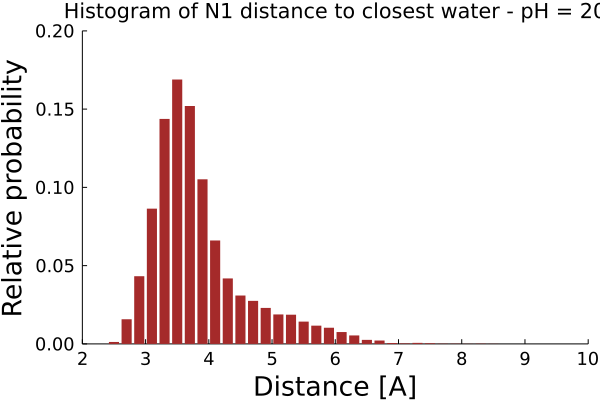

In [17]:
st = .2
bin_watlig = collect(min_dist:st:max_dist)
wgh_watlig = fill(1.0, length(watlig_dist_1_50))

# Histograma ponderado
Wbins_watlig, Whis_watlig = JUMD.weightedHist(watlig_dist_1_50, bin_watlig, wgh_watlig, true, false);

bar(Wbins_watlig, Whis_watlig,
    xlims = (st*10, max_dist), ylims = (0, .2),
    xticks = st*10:st*5:max_dist+st,
    linecolor = false, fillcolor = Colors.colorant"Brown",
    grid = false, legend = false,
    guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
    legendfont = font(12, "Arial"),
    title = string("Histogram of N1 distance to closest water - pH = ", 20),
    yaxis = "Relative probability", xaxis = "Distance [A]")

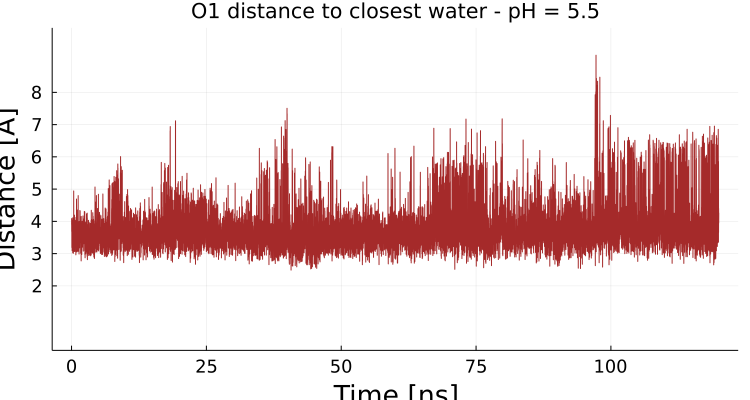

In [18]:
min_dist = 0
max_dist = 10
plot(collect(1:nstlim) ./ 100, watlig_dist_1_55,
    title = string("O1 distance to closest water - pH = ", 5.5), size = (750, 400),
    ylims = (min_dist, max_dist), label = false,
    yticks = collect(2:1:8),
    linecolor = Colors.colorant"Brown",
    guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
    legendfont = font(12, "Arial"),
    yaxis = "Distance [A]", xaxis = "Time [ns]")

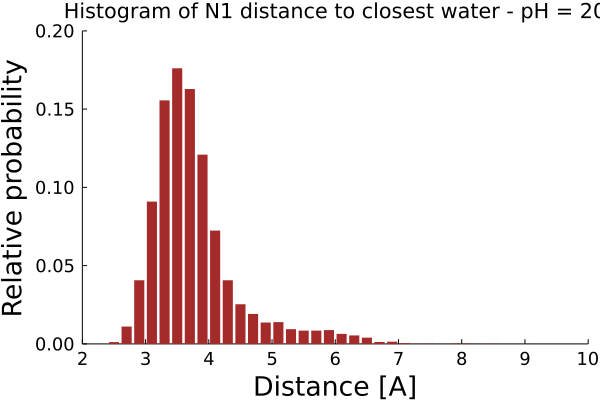

In [19]:
st = .2
bin_watlig = collect(min_dist:st:max_dist)
wgh_watlig = fill(1.0, length(watlig_dist_1_55))

# Histograma ponderado
Wbins_watlig, Whis_watlig = JUMD.weightedHist(watlig_dist_1_55, bin_watlig, wgh_watlig, true, false);

bar(Wbins_watlig, Whis_watlig,
    xlims = (st*10, max_dist), ylims = (0, .2),
    xticks = st*10:st*5:max_dist+st,
    linecolor = false, fillcolor = Colors.colorant"Brown",
    grid = false, legend = false,
    guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
    legendfont = font(12, "Arial"),
    title = string("Histogram of N1 distance to closest water - pH = ", 20),
    yaxis = "Relative probability", xaxis = "Distance [A]")

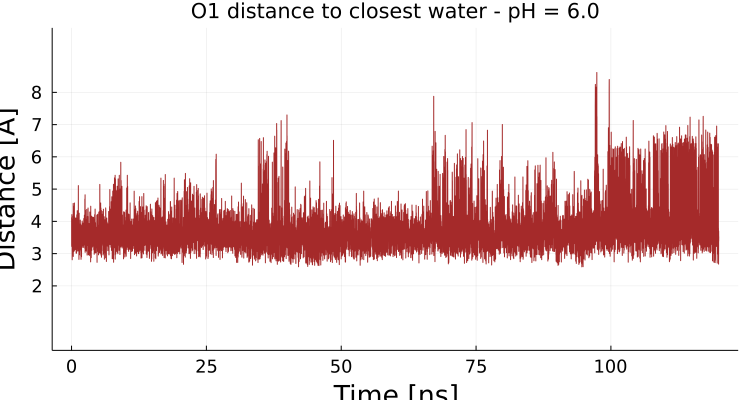

In [20]:
min_dist = 0
max_dist = 10
plot(collect(1:nstlim) ./ 100, watlig_dist_1_60,
    title = string("O1 distance to closest water - pH = ", 6.0), size = (750, 400),
    ylims = (min_dist, max_dist), label = false,
    yticks = collect(2:1:8),
    linecolor = Colors.colorant"Brown",
    guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
    legendfont = font(12, "Arial"),
    yaxis = "Distance [A]", xaxis = "Time [ns]")

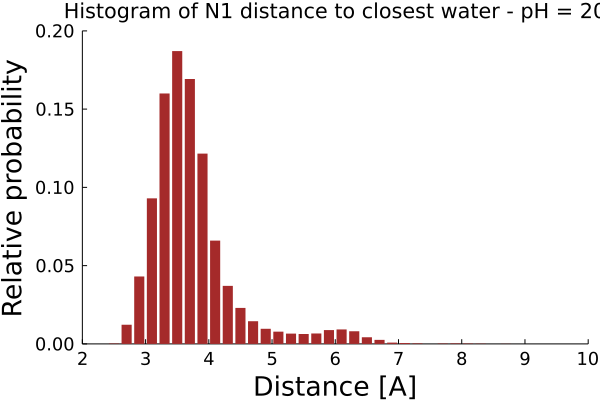

In [21]:
st = .2
bin_watlig = collect(min_dist:st:max_dist)
wgh_watlig = fill(1.0, length(watlig_dist_1_60))

# Histograma ponderado
Wbins_watlig, Whis_watlig = JUMD.weightedHist(watlig_dist_1_60, bin_watlig, wgh_watlig, true, false);

bar(Wbins_watlig, Whis_watlig,
    xlims = (st*10, max_dist), ylims = (0, .2),
    xticks = st*10:st*5:max_dist+st,
    linecolor = false, fillcolor = Colors.colorant"Brown",
    grid = false, legend = false,
    guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
    legendfont = font(12, "Arial"),
    title = string("Histogram of N1 distance to closest water - pH = ", 20),
    yaxis = "Relative probability", xaxis = "Distance [A]")

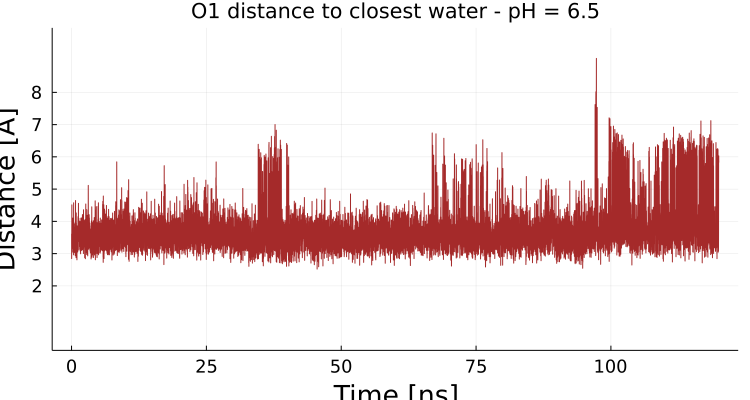

In [22]:
min_dist = 0
max_dist = 10
plot(collect(1:nstlim) ./ 100, watlig_dist_1_65,
    title = string("O1 distance to closest water - pH = ", 6.5), size = (750, 400),
    ylims = (min_dist, max_dist), label = false,
    yticks = collect(2:1:8),
    linecolor = Colors.colorant"Brown",
    guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
    legendfont = font(12, "Arial"),
    yaxis = "Distance [A]", xaxis = "Time [ns]")

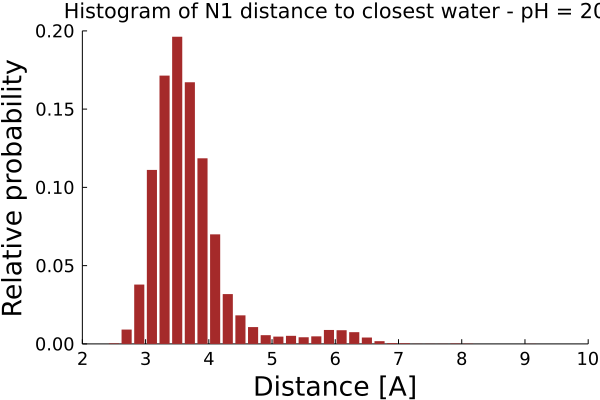

In [23]:
st = .2
bin_watlig = collect(min_dist:st:max_dist)
wgh_watlig = fill(1.0, length(watlig_dist_1_65))

# Histograma ponderado
Wbins_watlig, Whis_watlig = JUMD.weightedHist(watlig_dist_1_65, bin_watlig, wgh_watlig, true, false);

bar(Wbins_watlig, Whis_watlig,
    xlims = (st*10, max_dist), ylims = (0, .2),
    xticks = st*10:st*5:max_dist+st,
    linecolor = false, fillcolor = Colors.colorant"Brown",
    grid = false, legend = false,
    guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
    legendfont = font(12, "Arial"),
    title = string("Histogram of N1 distance to closest water - pH = ", 20),
    yaxis = "Relative probability", xaxis = "Distance [A]")

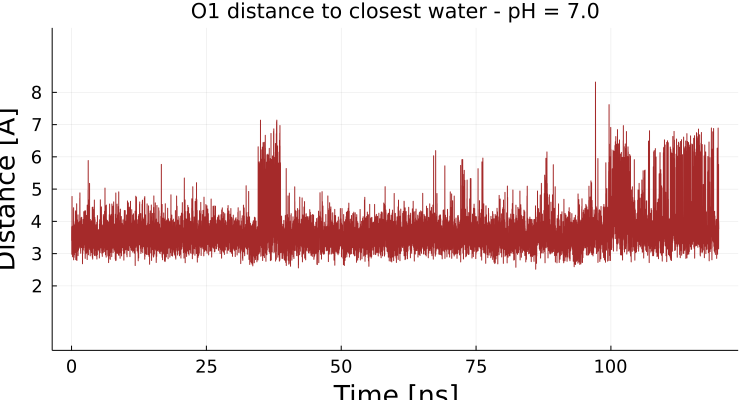

In [24]:
min_dist = 0
max_dist = 10
plot(collect(1:nstlim) ./ 100, watlig_dist_1_70,
    title = string("O1 distance to closest water - pH = ", 7.0), size = (750, 400),
    ylims = (min_dist, max_dist), label = false,
    yticks = collect(2:1:8),
    linecolor = Colors.colorant"Brown",
    guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
    legendfont = font(12, "Arial"),
    yaxis = "Distance [A]", xaxis = "Time [ns]")

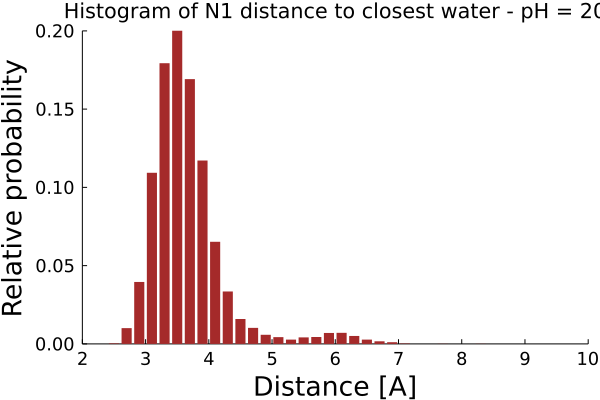

In [25]:
st = .2
bin_watlig = collect(min_dist:st:max_dist)
wgh_watlig = fill(1.0, length(watlig_dist_1_70))

# Histograma ponderado
Wbins_watlig, Whis_watlig = JUMD.weightedHist(watlig_dist_1_70, bin_watlig, wgh_watlig, true, false);

bar(Wbins_watlig, Whis_watlig,
    xlims = (st*10, max_dist), ylims = (0, .2),
    xticks = st*10:st*5:max_dist+st,
    linecolor = false, fillcolor = Colors.colorant"Brown",
    grid = false, legend = false,
    guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
    legendfont = font(12, "Arial"),
    title = string("Histogram of N1 distance to closest water - pH = ", 20),
    yaxis = "Relative probability", xaxis = "Distance [A]")

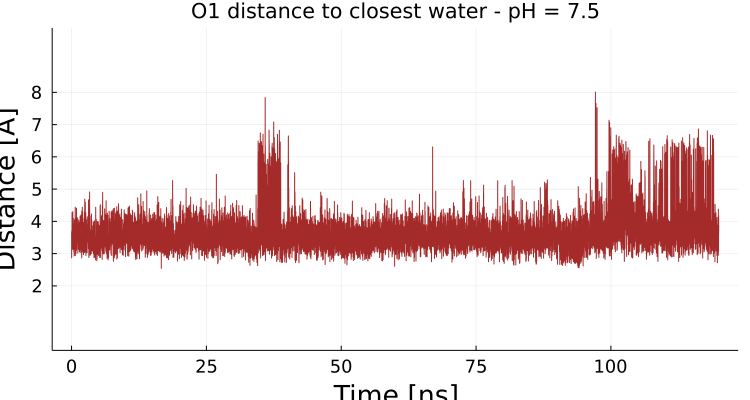

In [26]:
min_dist = 0
max_dist = 10
plot(collect(1:nstlim) ./ 100, watlig_dist_1_75,
    title = string("O1 distance to closest water - pH = ", 7.5), size = (750, 400),
    ylims = (min_dist, max_dist), label = false,
    yticks = collect(2:1:8),
    linecolor = Colors.colorant"Brown",
    guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
    legendfont = font(12, "Arial"),
    yaxis = "Distance [A]", xaxis = "Time [ns]")

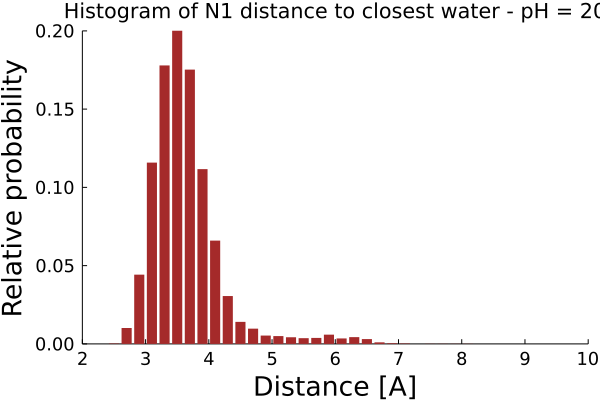

In [27]:
st = .2
bin_watlig = collect(min_dist:st:max_dist)
wgh_watlig = fill(1.0, length(watlig_dist_1_75))

# Histograma ponderado
Wbins_watlig, Whis_watlig = JUMD.weightedHist(watlig_dist_1_75, bin_watlig, wgh_watlig, true, false);

bar(Wbins_watlig, Whis_watlig,
    xlims = (st*10, max_dist), ylims = (0, .2),
    xticks = st*10:st*5:max_dist+st,
    linecolor = false, fillcolor = Colors.colorant"Brown",
    grid = false, legend = false,
    guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
    legendfont = font(12, "Arial"),
    title = string("Histogram of N1 distance to closest water - pH = ", 20),
    yaxis = "Relative probability", xaxis = "Distance [A]")

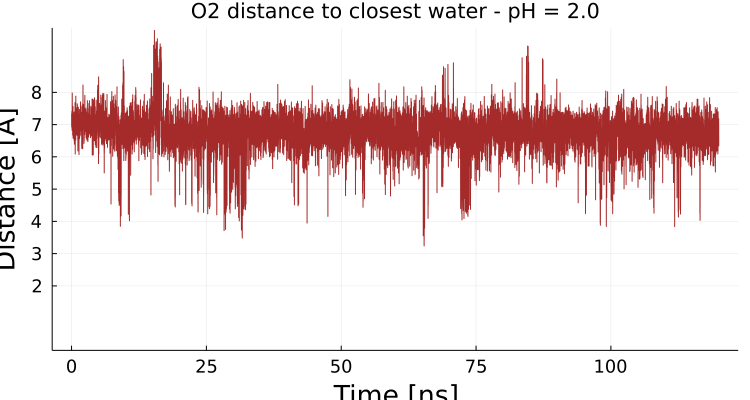

In [28]:
min_dist = 0
max_dist = 10
plot(collect(1:nstlim) ./ 100, watlig_dist_2_20,
    title = string("O2 distance to closest water - pH = ", 2.0), size = (750, 400),
    ylims = (min_dist, max_dist), label = false,
    yticks = collect(2:1:8),
    linecolor = Colors.colorant"Brown",
    guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
    legendfont = font(12, "Arial"),
    yaxis = "Distance [A]", xaxis = "Time [ns]")

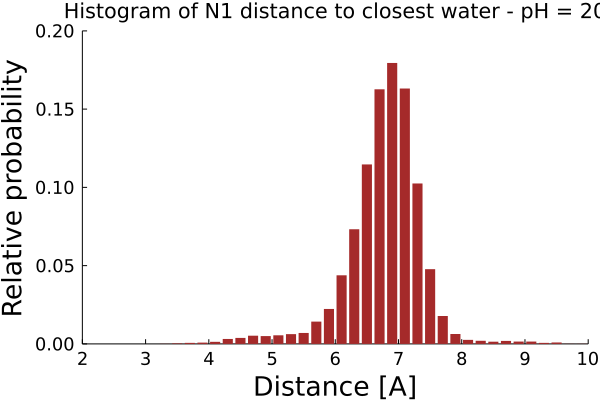

In [29]:
st = .2
bin_watlig = collect(min_dist:st:max_dist)
wgh_watlig = fill(1.0, length(watlig_dist_2_20))

# Histograma ponderado
Wbins_watlig, Whis_watlig = JUMD.weightedHist(watlig_dist_2_20, bin_watlig, wgh_watlig, true, false);

bar(Wbins_watlig, Whis_watlig,
    xlims = (st*10, max_dist), ylims = (0, .2),
    xticks = st*10:st*5:max_dist+st,
    linecolor = false, fillcolor = Colors.colorant"Brown",
    grid = false, legend = false,
    guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
    legendfont = font(12, "Arial"),
    title = string("Histogram of N1 distance to closest water - pH = ", 20),
    yaxis = "Relative probability", xaxis = "Distance [A]")

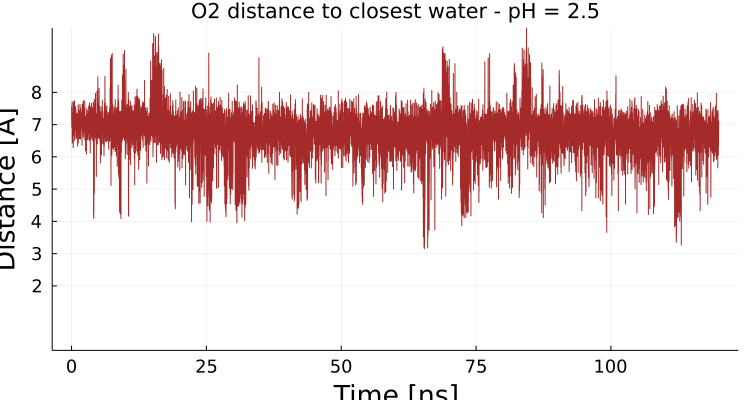

In [30]:
min_dist = 0
max_dist = 10
plot(collect(1:nstlim) ./ 100, watlig_dist_2_25,
    title = string("O2 distance to closest water - pH = ", 2.5), size = (750, 400),
    ylims = (min_dist, max_dist), label = false,
    yticks = collect(2:1:8),
    linecolor = Colors.colorant"Brown",
    guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
    legendfont = font(12, "Arial"),
    yaxis = "Distance [A]", xaxis = "Time [ns]")

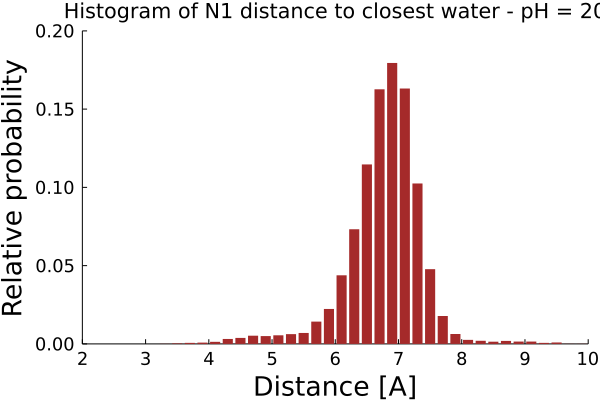

In [31]:
st = .2
bin_watlig = collect(min_dist:st:max_dist)
wgh_watlig = fill(1.0, length(watlig_dist_2_20))

# Histograma ponderado
Wbins_watlig, Whis_watlig = JUMD.weightedHist(watlig_dist_2_20, bin_watlig, wgh_watlig, true, false);

bar(Wbins_watlig, Whis_watlig,
    xlims = (st*10, max_dist), ylims = (0, .2),
    xticks = st*10:st*5:max_dist+st,
    linecolor = false, fillcolor = Colors.colorant"Brown",
    grid = false, legend = false,
    guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
    legendfont = font(12, "Arial"),
    title = string("Histogram of N1 distance to closest water - pH = ", 20),
    yaxis = "Relative probability", xaxis = "Distance [A]")

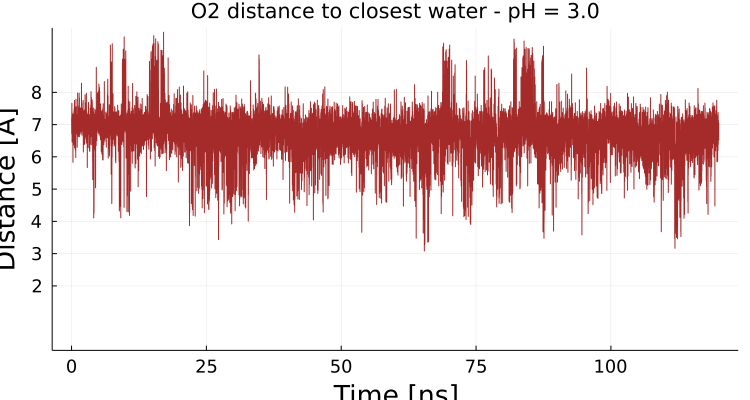

In [32]:
min_dist = 0
max_dist = 10
plot(collect(1:nstlim) ./ 100, watlig_dist_2_30,
    title = string("O2 distance to closest water - pH = ", 3.0), size = (750, 400),
    ylims = (min_dist, max_dist), label = false,
    yticks = collect(2:1:8),
    linecolor = Colors.colorant"Brown",
    guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
    legendfont = font(12, "Arial"),
    yaxis = "Distance [A]", xaxis = "Time [ns]")

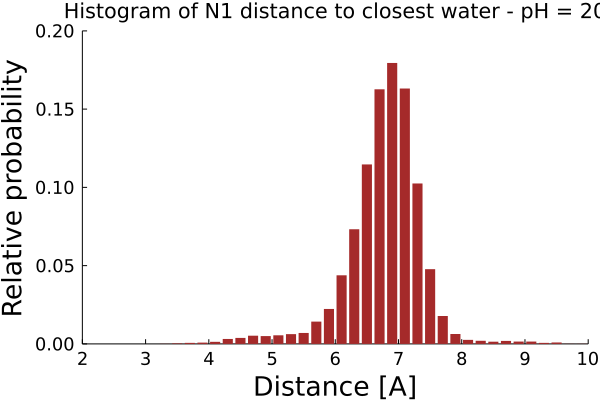

In [33]:
st = .2
bin_watlig = collect(min_dist:st:max_dist)
wgh_watlig = fill(1.0, length(watlig_dist_2_20))

# Histograma ponderado
Wbins_watlig, Whis_watlig = JUMD.weightedHist(watlig_dist_2_20, bin_watlig, wgh_watlig, true, false);

bar(Wbins_watlig, Whis_watlig,
    xlims = (st*10, max_dist), ylims = (0, .2),
    xticks = st*10:st*5:max_dist+st,
    linecolor = false, fillcolor = Colors.colorant"Brown",
    grid = false, legend = false,
    guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
    legendfont = font(12, "Arial"),
    title = string("Histogram of N1 distance to closest water - pH = ", 20),
    yaxis = "Relative probability", xaxis = "Distance [A]")

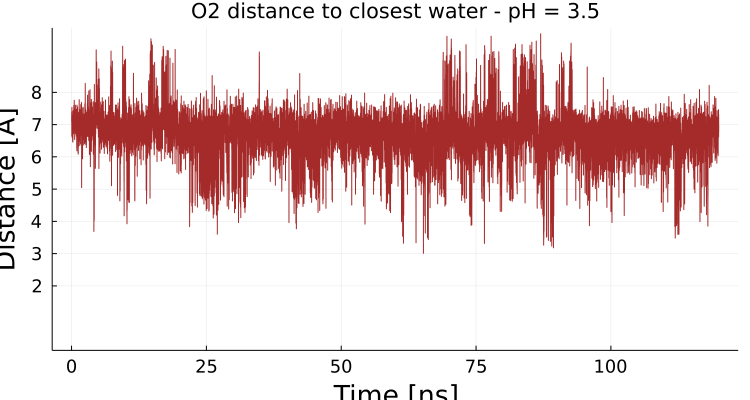

In [34]:
min_dist = 0
max_dist = 10
plot(collect(1:nstlim) ./ 100, watlig_dist_2_35,
    title = string("O2 distance to closest water - pH = ", 3.5), size = (750, 400),
    ylims = (min_dist, max_dist), label = false,
    yticks = collect(2:1:8),
    linecolor = Colors.colorant"Brown",
    guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
    legendfont = font(12, "Arial"),
    yaxis = "Distance [A]", xaxis = "Time [ns]")

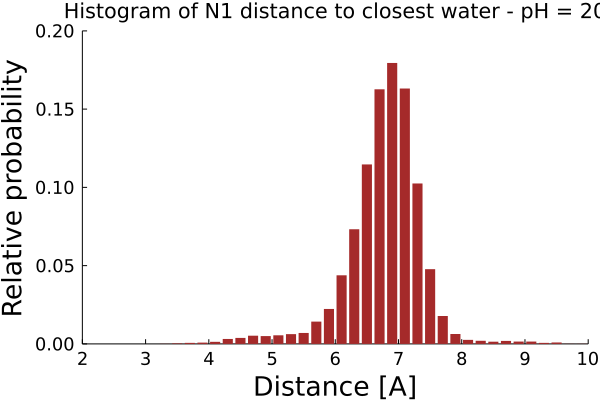

In [35]:
st = .2
bin_watlig = collect(min_dist:st:max_dist)
wgh_watlig = fill(1.0, length(watlig_dist_2_20))

# Histograma ponderado
Wbins_watlig, Whis_watlig = JUMD.weightedHist(watlig_dist_2_20, bin_watlig, wgh_watlig, true, false);

bar(Wbins_watlig, Whis_watlig,
    xlims = (st*10, max_dist), ylims = (0, .2),
    xticks = st*10:st*5:max_dist+st,
    linecolor = false, fillcolor = Colors.colorant"Brown",
    grid = false, legend = false,
    guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
    legendfont = font(12, "Arial"),
    title = string("Histogram of N1 distance to closest water - pH = ", 20),
    yaxis = "Relative probability", xaxis = "Distance [A]")

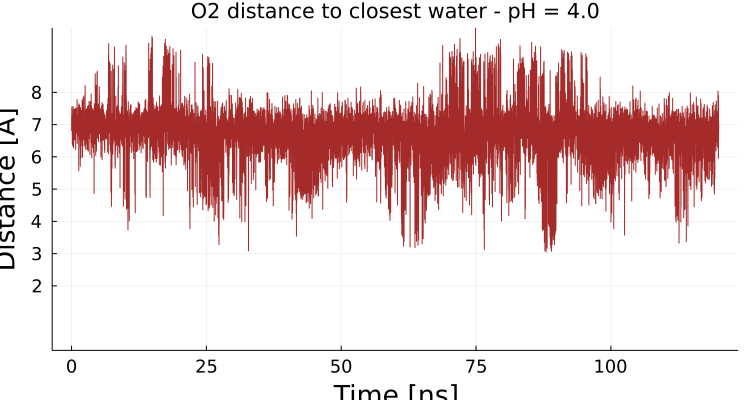

In [36]:
min_dist = 0
max_dist = 10
plot(collect(1:nstlim) ./ 100, watlig_dist_2_40,
    title = string("O2 distance to closest water - pH = ", 4.0), size = (750, 400),
    ylims = (min_dist, max_dist), label = false,
    yticks = collect(2:1:8),
    linecolor = Colors.colorant"Brown",
    guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
    legendfont = font(12, "Arial"),
    yaxis = "Distance [A]", xaxis = "Time [ns]")

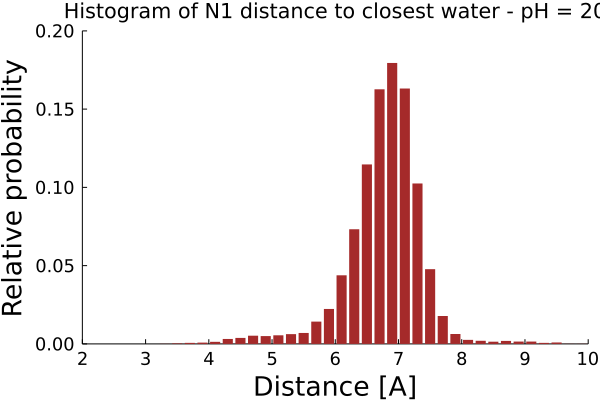

In [37]:
st = .2
bin_watlig = collect(min_dist:st:max_dist)
wgh_watlig = fill(1.0, length(watlig_dist_2_20))

# Histograma ponderado
Wbins_watlig, Whis_watlig = JUMD.weightedHist(watlig_dist_2_20, bin_watlig, wgh_watlig, true, false);

bar(Wbins_watlig, Whis_watlig,
    xlims = (st*10, max_dist), ylims = (0, .2),
    xticks = st*10:st*5:max_dist+st,
    linecolor = false, fillcolor = Colors.colorant"Brown",
    grid = false, legend = false,
    guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
    legendfont = font(12, "Arial"),
    title = string("Histogram of N1 distance to closest water - pH = ", 20),
    yaxis = "Relative probability", xaxis = "Distance [A]")

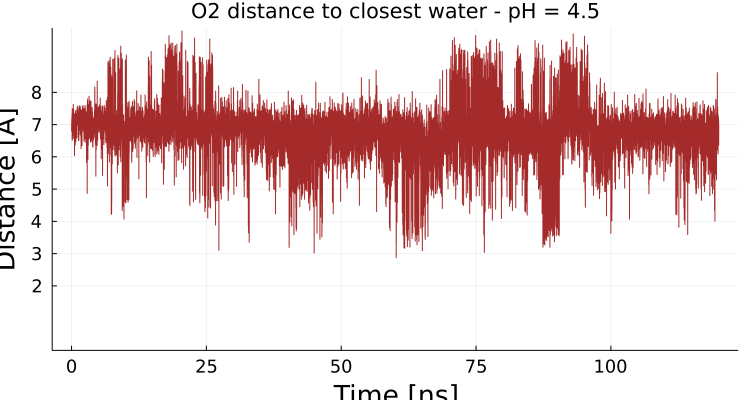

In [38]:
min_dist = 0
max_dist = 10
plot(collect(1:nstlim) ./ 100, watlig_dist_2_45,
    title = string("O2 distance to closest water - pH = ", 4.5), size = (750, 400),
    ylims = (min_dist, max_dist), label = false,
    yticks = collect(2:1:8),
    linecolor = Colors.colorant"Brown",
    guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
    legendfont = font(12, "Arial"),
    yaxis = "Distance [A]", xaxis = "Time [ns]")

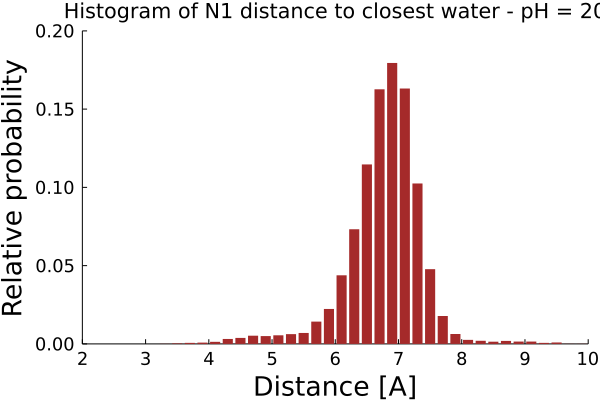

In [39]:
st = .2
bin_watlig = collect(min_dist:st:max_dist)
wgh_watlig = fill(1.0, length(watlig_dist_2_20))

# Histograma ponderado
Wbins_watlig, Whis_watlig = JUMD.weightedHist(watlig_dist_2_20, bin_watlig, wgh_watlig, true, false);

bar(Wbins_watlig, Whis_watlig,
    xlims = (st*10, max_dist), ylims = (0, .2),
    xticks = st*10:st*5:max_dist+st,
    linecolor = false, fillcolor = Colors.colorant"Brown",
    grid = false, legend = false,
    guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
    legendfont = font(12, "Arial"),
    title = string("Histogram of N1 distance to closest water - pH = ", 20),
    yaxis = "Relative probability", xaxis = "Distance [A]")

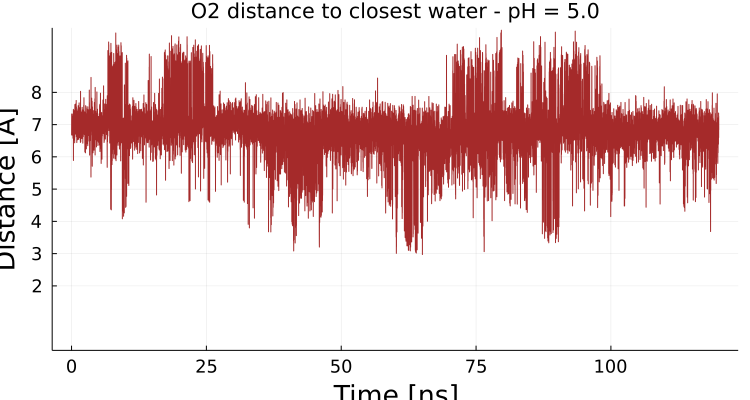

In [40]:
min_dist = 0
max_dist = 10
plot(collect(1:nstlim) ./ 100, watlig_dist_2_50,
    title = string("O2 distance to closest water - pH = ", 5.0), size = (750, 400),
    ylims = (min_dist, max_dist), label = false,
    yticks = collect(2:1:8),
    linecolor = Colors.colorant"Brown",
    guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
    legendfont = font(12, "Arial"),
    yaxis = "Distance [A]", xaxis = "Time [ns]")

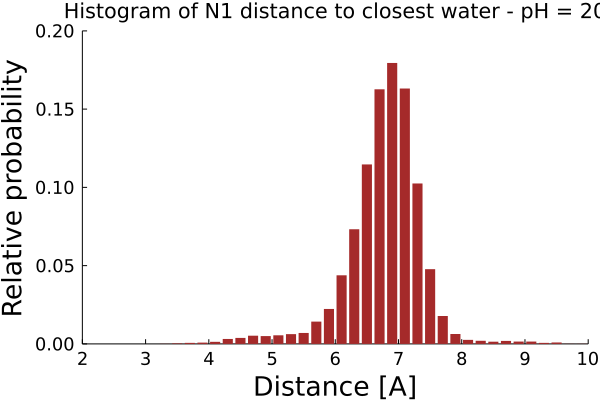

In [41]:
st = .2
bin_watlig = collect(min_dist:st:max_dist)
wgh_watlig = fill(1.0, length(watlig_dist_2_20))

# Histograma ponderado
Wbins_watlig, Whis_watlig = JUMD.weightedHist(watlig_dist_2_20, bin_watlig, wgh_watlig, true, false);

bar(Wbins_watlig, Whis_watlig,
    xlims = (st*10, max_dist), ylims = (0, .2),
    xticks = st*10:st*5:max_dist+st,
    linecolor = false, fillcolor = Colors.colorant"Brown",
    grid = false, legend = false,
    guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
    legendfont = font(12, "Arial"),
    title = string("Histogram of N1 distance to closest water - pH = ", 20),
    yaxis = "Relative probability", xaxis = "Distance [A]")

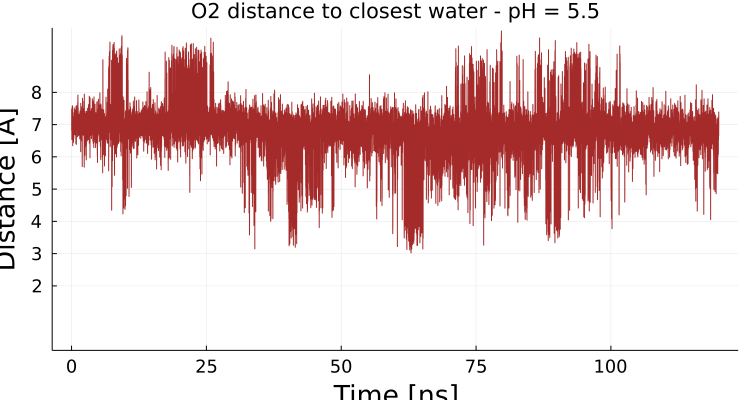

In [42]:
min_dist = 0
max_dist = 10
plot(collect(1:nstlim) ./ 100, watlig_dist_2_55,
    title = string("O2 distance to closest water - pH = ", 5.5), size = (750, 400),
    ylims = (min_dist, max_dist), label = false,
    yticks = collect(2:1:8),
    linecolor = Colors.colorant"Brown",
    guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
    legendfont = font(12, "Arial"),
    yaxis = "Distance [A]", xaxis = "Time [ns]")

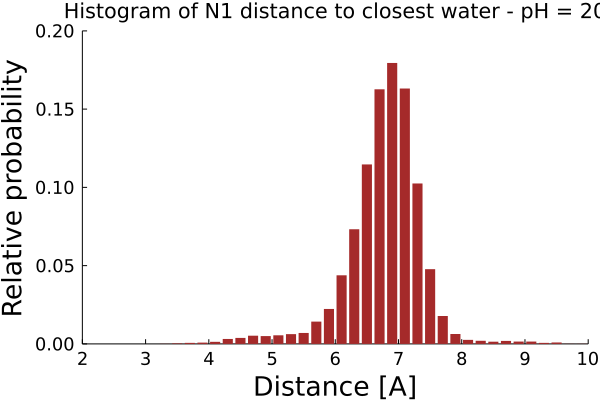

In [43]:
st = .2
bin_watlig = collect(min_dist:st:max_dist)
wgh_watlig = fill(1.0, length(watlig_dist_2_20))

# Histograma ponderado
Wbins_watlig, Whis_watlig = JUMD.weightedHist(watlig_dist_2_20, bin_watlig, wgh_watlig, true, false);

bar(Wbins_watlig, Whis_watlig,
    xlims = (st*10, max_dist), ylims = (0, .2),
    xticks = st*10:st*5:max_dist+st,
    linecolor = false, fillcolor = Colors.colorant"Brown",
    grid = false, legend = false,
    guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
    legendfont = font(12, "Arial"),
    title = string("Histogram of N1 distance to closest water - pH = ", 20),
    yaxis = "Relative probability", xaxis = "Distance [A]")

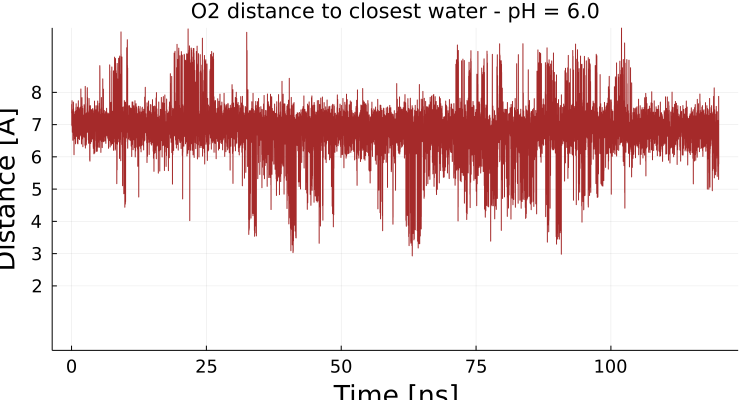

In [44]:
min_dist = 0
max_dist = 10
plot(collect(1:nstlim) ./ 100, watlig_dist_2_60,
    title = string("O2 distance to closest water - pH = ", 6.0), size = (750, 400),
    ylims = (min_dist, max_dist), label = false,
    yticks = collect(2:1:8),
    linecolor = Colors.colorant"Brown",
    guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
    legendfont = font(12, "Arial"),
    yaxis = "Distance [A]", xaxis = "Time [ns]")

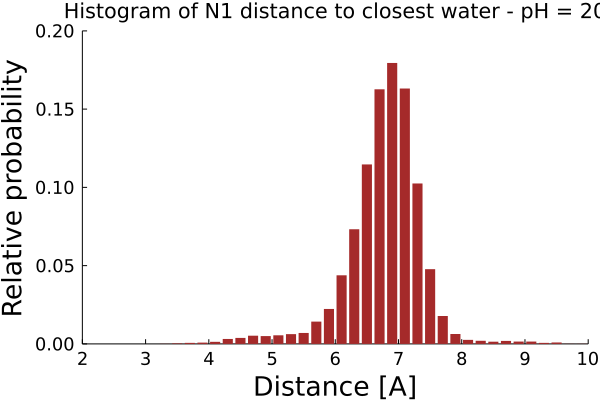

In [45]:
st = .2
bin_watlig = collect(min_dist:st:max_dist)
wgh_watlig = fill(1.0, length(watlig_dist_2_20))

# Histograma ponderado
Wbins_watlig, Whis_watlig = JUMD.weightedHist(watlig_dist_2_20, bin_watlig, wgh_watlig, true, false);

bar(Wbins_watlig, Whis_watlig,
    xlims = (st*10, max_dist), ylims = (0, .2),
    xticks = st*10:st*5:max_dist+st,
    linecolor = false, fillcolor = Colors.colorant"Brown",
    grid = false, legend = false,
    guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
    legendfont = font(12, "Arial"),
    title = string("Histogram of N1 distance to closest water - pH = ", 20),
    yaxis = "Relative probability", xaxis = "Distance [A]")

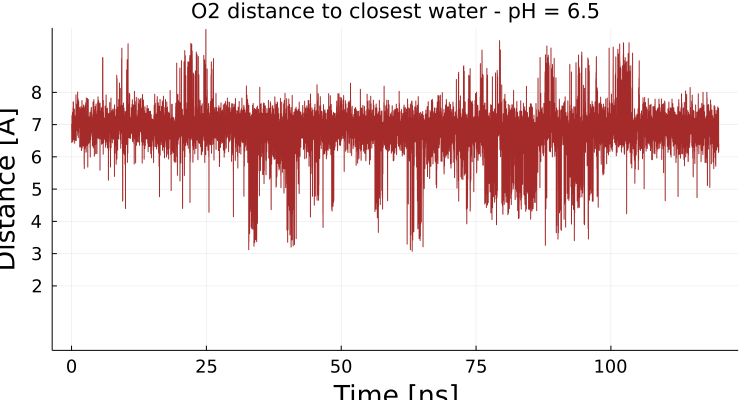

In [46]:
min_dist = 0
max_dist = 10
plot(collect(1:nstlim) ./ 100, watlig_dist_2_65,
    title = string("O2 distance to closest water - pH = ", 6.5), size = (750, 400),
    ylims = (min_dist, max_dist), label = false,
    yticks = collect(2:1:8),
    linecolor = Colors.colorant"Brown",
    guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
    legendfont = font(12, "Arial"),
    yaxis = "Distance [A]", xaxis = "Time [ns]")

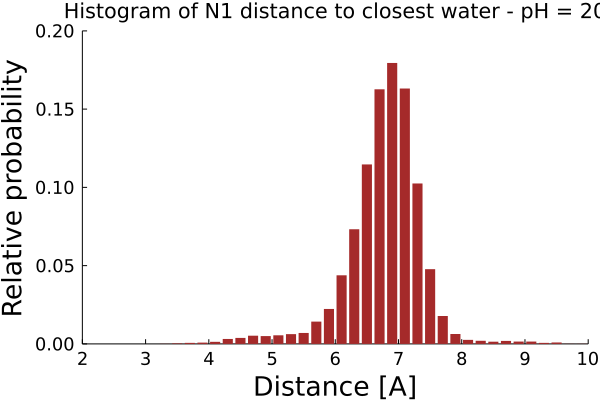

In [47]:
st = .2
bin_watlig = collect(min_dist:st:max_dist)
wgh_watlig = fill(1.0, length(watlig_dist_2_20))

# Histograma ponderado
Wbins_watlig, Whis_watlig = JUMD.weightedHist(watlig_dist_2_20, bin_watlig, wgh_watlig, true, false);

bar(Wbins_watlig, Whis_watlig,
    xlims = (st*10, max_dist), ylims = (0, .2),
    xticks = st*10:st*5:max_dist+st,
    linecolor = false, fillcolor = Colors.colorant"Brown",
    grid = false, legend = false,
    guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
    legendfont = font(12, "Arial"),
    title = string("Histogram of N1 distance to closest water - pH = ", 20),
    yaxis = "Relative probability", xaxis = "Distance [A]")

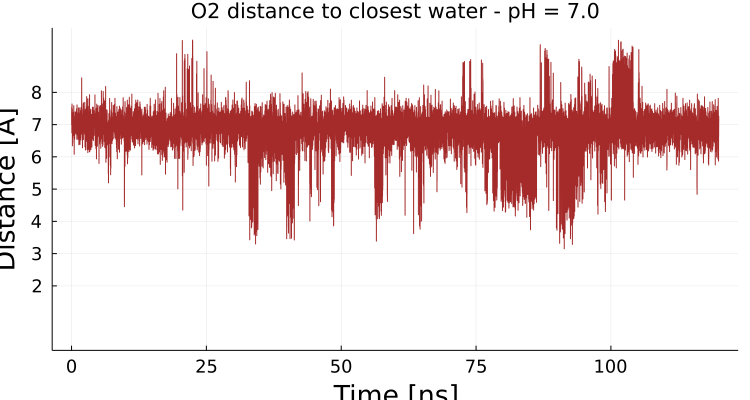

In [48]:
min_dist = 0
max_dist = 10
plot(collect(1:nstlim) ./ 100, watlig_dist_2_70,
    title = string("O2 distance to closest water - pH = ", 7.0), size = (750, 400),
    ylims = (min_dist, max_dist), label = false,
    yticks = collect(2:1:8),
    linecolor = Colors.colorant"Brown",
    guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
    legendfont = font(12, "Arial"),
    yaxis = "Distance [A]", xaxis = "Time [ns]")

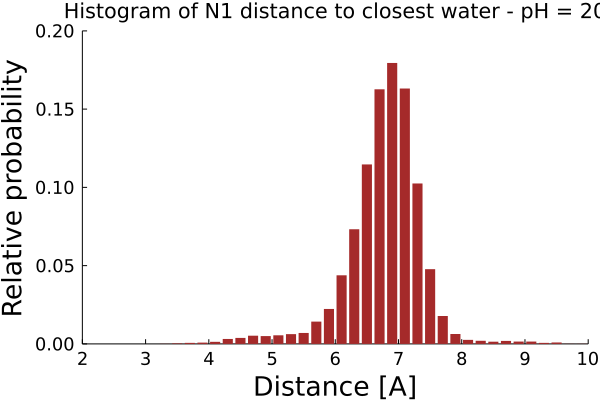

In [49]:
st = .2
bin_watlig = collect(min_dist:st:max_dist)
wgh_watlig = fill(1.0, length(watlig_dist_2_20))

# Histograma ponderado
Wbins_watlig, Whis_watlig = JUMD.weightedHist(watlig_dist_2_20, bin_watlig, wgh_watlig, true, false);

bar(Wbins_watlig, Whis_watlig,
    xlims = (st*10, max_dist), ylims = (0, .2),
    xticks = st*10:st*5:max_dist+st,
    linecolor = false, fillcolor = Colors.colorant"Brown",
    grid = false, legend = false,
    guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
    legendfont = font(12, "Arial"),
    title = string("Histogram of N1 distance to closest water - pH = ", 20),
    yaxis = "Relative probability", xaxis = "Distance [A]")

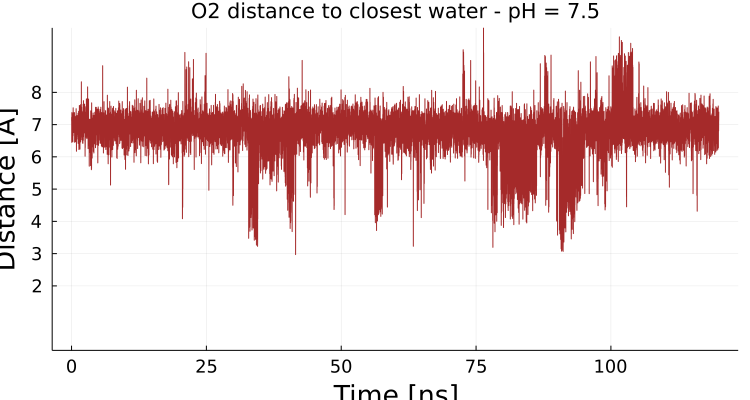

In [50]:
min_dist = 0
max_dist = 10
plot(collect(1:nstlim) ./ 100, watlig_dist_2_75,
    title = string("O2 distance to closest water - pH = ", 7.5), size = (750, 400),
    ylims = (min_dist, max_dist), label = false,
    yticks = collect(2:1:8),
    linecolor = Colors.colorant"Brown",
    guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
    legendfont = font(12, "Arial"),
    yaxis = "Distance [A]", xaxis = "Time [ns]")

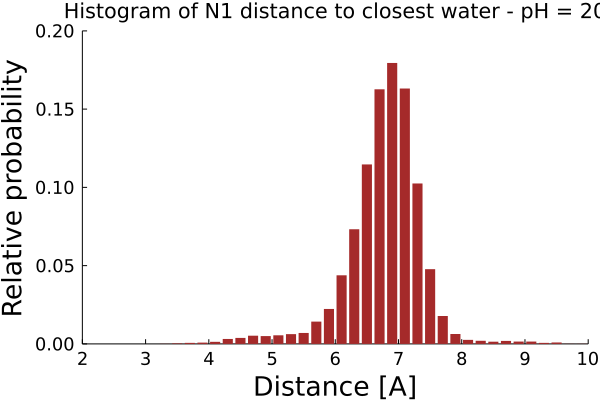

In [51]:
st = .2
bin_watlig = collect(min_dist:st:max_dist)
wgh_watlig = fill(1.0, length(watlig_dist_2_20))

# Histograma ponderado
Wbins_watlig, Whis_watlig = JUMD.weightedHist(watlig_dist_2_20, bin_watlig, wgh_watlig, true, false);

bar(Wbins_watlig, Whis_watlig,
    xlims = (st*10, max_dist), ylims = (0, .2),
    xticks = st*10:st*5:max_dist+st,
    linecolor = false, fillcolor = Colors.colorant"Brown",
    grid = false, legend = false,
    guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
    legendfont = font(12, "Arial"),
    title = string("Histogram of N1 distance to closest water - pH = ", 20),
    yaxis = "Relative probability", xaxis = "Distance [A]")

In [52]:
vals = vcat([ mean(watlig_dist_1_20) std(watlig_dist_1_20) std(watlig_dist_1_20) / mean(watlig_dist_1_20) ],
[ mean(watlig_dist_1_25) std(watlig_dist_1_25) std(watlig_dist_1_25) / mean(watlig_dist_1_25) ],
[ mean(watlig_dist_1_30) std(watlig_dist_1_30) std(watlig_dist_1_30) / mean(watlig_dist_1_30) ],
[ mean(watlig_dist_1_35) std(watlig_dist_1_35) std(watlig_dist_1_35) / mean(watlig_dist_1_35) ],
[ mean(watlig_dist_1_40) std(watlig_dist_1_40) std(watlig_dist_1_40) / mean(watlig_dist_1_40) ],
[ mean(watlig_dist_1_45) std(watlig_dist_1_45) std(watlig_dist_1_45) / mean(watlig_dist_1_45) ],
[ mean(watlig_dist_1_50) std(watlig_dist_1_50) std(watlig_dist_1_50) / mean(watlig_dist_1_50) ],
[ mean(watlig_dist_1_55) std(watlig_dist_1_55) std(watlig_dist_1_55) / mean(watlig_dist_1_55) ],
[ mean(watlig_dist_1_60) std(watlig_dist_1_60) std(watlig_dist_1_60) / mean(watlig_dist_1_60) ],
[ mean(watlig_dist_1_65) std(watlig_dist_1_65) std(watlig_dist_1_65) / mean(watlig_dist_1_65) ],
[ mean(watlig_dist_1_70) std(watlig_dist_1_70) std(watlig_dist_1_70) / mean(watlig_dist_1_70) ],
[ mean(watlig_dist_1_75) std(watlig_dist_1_75) std(watlig_dist_1_75) / mean(watlig_dist_1_75) ])

NamedArray(vals, (string.(phs), ["μ" ; "std" ; "μ/std"]))

12×3 Named Matrix{Float64}
A ╲ B │        μ       std     μ/std
──────┼─────────────────────────────
2.0   │  3.79172  0.798342  0.210549
2.5   │  3.75866   0.73046   0.19434
3.0   │  3.76322  0.726543  0.193064
3.5   │  3.78528  0.749364  0.197968
4.0   │  3.78789  0.762003  0.201168
4.5   │  3.83554  0.764285  0.199264
5.0   │  3.84161  0.759756   0.19777
5.5   │  3.77982  0.703672  0.186165
6.0   │  3.75264  0.706215  0.188192
6.5   │  3.70368  0.659632  0.178102
7.0   │  3.66884  0.611078  0.166559
7.5   │  3.64339  0.579167  0.158964

In [53]:
vals = vcat([ mean(watlig_dist_2_20) std(watlig_dist_2_20) std(watlig_dist_2_20) / mean(watlig_dist_2_20) ],
[ mean(watlig_dist_2_25) std(watlig_dist_2_25) std(watlig_dist_2_25) / mean(watlig_dist_2_25) ],
[ mean(watlig_dist_2_30) std(watlig_dist_2_30) std(watlig_dist_2_30) / mean(watlig_dist_2_30) ],
[ mean(watlig_dist_2_35) std(watlig_dist_2_35) std(watlig_dist_2_35) / mean(watlig_dist_2_35) ],
[ mean(watlig_dist_2_40) std(watlig_dist_2_40) std(watlig_dist_2_40) / mean(watlig_dist_2_40) ],
[ mean(watlig_dist_2_45) std(watlig_dist_2_45) std(watlig_dist_2_45) / mean(watlig_dist_2_45) ],
[ mean(watlig_dist_2_50) std(watlig_dist_2_50) std(watlig_dist_2_50) / mean(watlig_dist_2_50) ],
[ mean(watlig_dist_2_55) std(watlig_dist_2_55) std(watlig_dist_2_55) / mean(watlig_dist_2_55) ],
[ mean(watlig_dist_2_60) std(watlig_dist_2_60) std(watlig_dist_2_60) / mean(watlig_dist_2_60) ],
[ mean(watlig_dist_2_65) std(watlig_dist_2_65) std(watlig_dist_2_65) / mean(watlig_dist_2_65) ],
[ mean(watlig_dist_2_70) std(watlig_dist_2_70) std(watlig_dist_2_70) / mean(watlig_dist_2_70) ],
[ mean(watlig_dist_2_75) std(watlig_dist_2_75) std(watlig_dist_2_75) / mean(watlig_dist_2_75) ])

NamedArray(vals, (string.(phs), ["μ" ; "std" ; "μ/std"]))

12×3 Named Matrix{Float64}
A ╲ B │         μ        std      μ/std
──────┼────────────────────────────────
2.0   │   6.77115   0.607221  0.0896777
2.5   │     6.747   0.660691  0.0979237
3.0   │   6.71253   0.707209   0.105357
3.5   │   6.70269   0.739004   0.110255
4.0   │   6.69381   0.808819   0.120831
4.5   │   6.76418   0.854926    0.12639
5.0   │   6.82778   0.863656   0.126492
5.5   │   6.83038   0.811748   0.118844
6.0   │   6.83601   0.738502   0.108031
6.5   │   6.83859   0.672657  0.0983618
7.0   │     6.825   0.683937   0.100211
7.5   │   6.79314   0.720296   0.106033